# This should automatically analyze a text file of the data from the gyroscope/accelerometer.

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('dark_background')

In [130]:
path = input('path to file: ')
# also had to delete the first and last row from the .txt file itself

path to file:  C:\Users\mhanr\Desktop\NIST\Data\xu_side2.txt


In [131]:
# turn all the data into numpy arrays
names = 'count, timestamp, x_accel, y_accel, z_accel, x_gyro, y_gyro, z_gyro'
all_data = np.genfromtxt(path, names = names, skip_footer = 1)

In [132]:
## make the residual arrays for plotting
# x_a_resid = np.array(x_accel_bits - np.average(x_accel_bits))
# y_a_resid = np.array(y_accel_bits - np.average(y_accel_bits))
# z_a_resid = np.array(z_accel_bits - np.average(z_accel_bits))
# x_g_resid = np.array(x_gyro_bits - np.average(x_gyro_bits))
# y_g_resid = np.array(y_gyro_bits - np.average(y_gyro_bits))
# z_g_resid = np.array(z_gyro_bits - np.average(z_gyro_bits))

16528.029 +/- 289.7920230717195
-908.079 +/- 163.06004733226345
162.563 +/- 321.8163826221406
878.526 +/- 204.14572563734956
-1406.194 +/- 415.76160651989017
-791.299 +/- 193.9337371268857


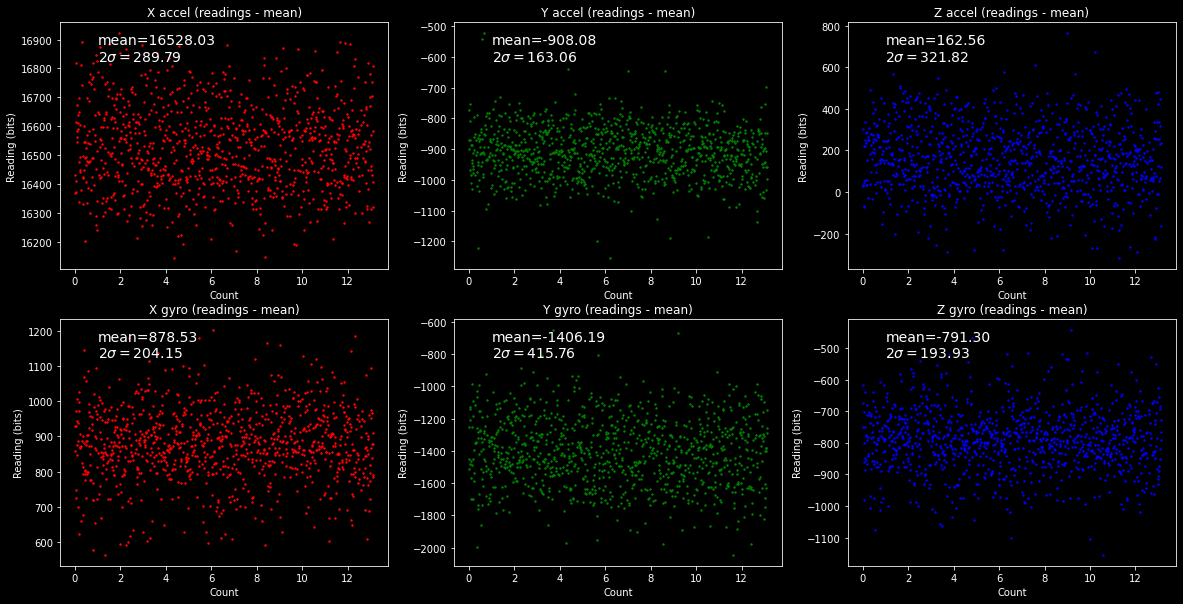

In [133]:
# now make the plots of acceleration in bits
fig, ax = plt.subplots(2,3, figsize = (20,10))
ax[0,0].scatter(all_data['timestamp'], all_data['x_accel'], c = 'r', s= 2)
ax[0,1].scatter(all_data['timestamp'], all_data['y_accel'], c = 'g', s= 2)
ax[0,2].scatter(all_data['timestamp'], all_data['z_accel'], c = 'b', s= 2)

ax[1,0].scatter(all_data['timestamp'], all_data['x_gyro'], c = 'r', s = 2)
ax[1,1].scatter(all_data['timestamp'], all_data['y_gyro'], c = 'g', s = 2)
ax[1,2].scatter(all_data['timestamp'], all_data['z_gyro'], c = 'b', s = 2)

ax[0,0].set_title('X accel (readings - mean)')
ax[0,1].set_title('Y accel (readings - mean)')
ax[0,2].set_title('Z accel (readings - mean)')

ax[1,0].set_title('X gyro (readings - mean)')
ax[1,1].set_title('Y gyro (readings - mean)')
ax[1,2].set_title('Z gyro (readings - mean)')

for x in ax.flat:
    x.set(xlabel='Count', ylabel='Reading (bits)')
    
accel_list = [all_data['x_accel'], all_data['y_accel'], all_data['z_accel']]
gyro_list = [all_data['x_gyro'], all_data['y_gyro'], all_data['z_gyro']]

accel_lists = [accel_list, gyro_list]

for x in range(len(accel_lists)):
    for i in range(len(accel_list)):
        textstr = '\n'.join((
        r'mean=%.2f' % (np.average(accel_lists[x][i])),
        r'$2\sigma=%.2f$' % (2*np.std(accel_lists[x][i]), )))
        ax[x,i].text(1, np.max(accel_lists[x][i]), textstr, fontsize=14,
        verticalalignment='top')
        # print values if desired
        print(np.average(accel_lists[x][i]), '+/-', str(2*np.std(accel_lists[x][i])))